In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [72]:
def get_tv_csv(path):
  df = pd.read_csv(filepath_or_buffer=path)
  #print(df)
  df['time'] = pd.to_datetime(df['date'], unit='ms')
  df['time'] = df['time'].dt.date
  df['time'] = df['time'].apply(pd.DateOffset(1))
  df = df.set_index(df['time'])
  df['evolution'] = df['close'].pct_change()
  df["log"] = np.log(df["close"]) 
  df["log"] = df["log"].diff().cumsum() + 1 
  df.drop(columns=df.columns.difference(['open', 'high', 'low','close', 'evolution', 'volume', 'log']), inplace=True)
  #print(df)
  return df

def plot_both(df1,df2):
  fig, ax_left = plt.subplots(figsize=(20,15), nrows=1, ncols=1)
  ax_right = ax_left.twinx()
  ax_left.set_yscale('log')
  ax_right.set_yscale('log')

  c1 = df1['close'].copy().loc['2020-01':]
  c2 = df2['close'].copy().loc['2020-01':]
  c1 = c1.loc[c1.index & c2.index]
  c2 = c2.loc[c1.index & c2.index]

  result = pd.concat([c1,c2], axis=1, join="inner")

  ax_left.plot(c1, color='blue')
  ax_right.plot(c2, color='orange')
  print('Correlation price=', round(c1.corr(c2)*100,2),"%")

  c1 = df1['evolution'].copy().loc['2020-01':]
  c2 = df2['evolution'].copy().loc['2020-01':]
  c1 = c1.loc[c1.index & c2.index]
  c2 = c2.loc[c1.index & c2.index]

  print('\nCorrelation Return =', round(c1.corr(c2)*100,2),"%")

df_btc=get_tv_csv('BTC-USDT_1D.csv')
df_eth=get_tv_csv('ETH-USDT_1D.csv')
df_bnb=get_tv_csv('BNB-USDT_1D.csv')

df_btc

,open,high,low,close,volume,evolution,log
time,,,,,,,
2017-08-18,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN
2017-08-19,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,0.957887
2017-08-20,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,0.965552
2017-08-21,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,0.952498
2017-08-22,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,0.935147
...,...,...,...,...,...,...,...
2025-02-16,97500.47,97972.26,97223.58,97569.66,7349.376830,0.000710,4.125427
2025-02-17,97569.67,97704.47,96046.18,96118.12,8191.424900,-0.014877,4.110439
2025-02-18,96118.12,97046.59,95205.00,95780.00,16492.045100,-0.003518,4.106915


In [67]:
df_ndaq=pd.read_csv("NASDAQ2.csv")
df_ndaq.columns = df_ndaq.columns.str.lower()
df_ndaq = df_ndaq.rename(columns={"price": "close", "vol.": "volume", "change %": "evolution"})
df_ndaq["evolution"] = df_ndaq["evolution"].str.rstrip("%").astype(float) / 100
df_ndaq["close"] = df_ndaq["close"].str.replace(",", "").astype(float)
df_ndaq["open"] = df_ndaq["open"].str.replace(",", "").astype(float)
df_ndaq["high"] = df_ndaq["high"].str.replace(",", "").astype(float)
df_ndaq["low"] = df_ndaq["low"].str.replace(",", "").astype(float)
df_ndaq = df_ndaq.set_index(df_ndaq['date'])
del df_ndaq["date"]
df_ndaq["close"] = pd.to_numeric(df_ndaq["close"], errors="coerce")
df_ndaq["log"] = np.log(df_ndaq["close"]) 
df_ndaq["log"] = df_ndaq["log"].diff().cumsum() + 1
df_ndaq.index = pd.to_datetime(df_ndaq.index)
df_ndaq

,close,open,high,low,volume,evolution,log
date,,,,,,,
2025-01-31,19627.44,19832.33,19969.17,19575.21,1.44B,-0.0028,NaN
2025-01-30,19681.75,19697.53,19785.79,19483.83,1.25B,0.0025,1.002763
2025-01-29,19632.32,19695.68,19699.82,19479.51,1.16B,-0.0051,1.000249
2025-01-28,19733.59,19418.22,19759.43,19294.62,1.34B,0.0203,1.005394
2025-01-27,19341.83,19234.04,19514.35,19204.95,1.68B,-0.0307,0.985342
...,...,...,...,...,...,...,...
2017-01-09,5531.82,5527.57,5541.08,5517.14,433.10M,0.0019,-0.266412
2017-01-06,5521.06,5499.08,5536.52,5482.81,382.85M,0.0060,-0.268359
2017-01-05,5487.94,5474.39,5495.85,5464.36,423.64M,0.0020,-0.274376


Correlation price= 92.47 %

Correlation Return = -4.73 %


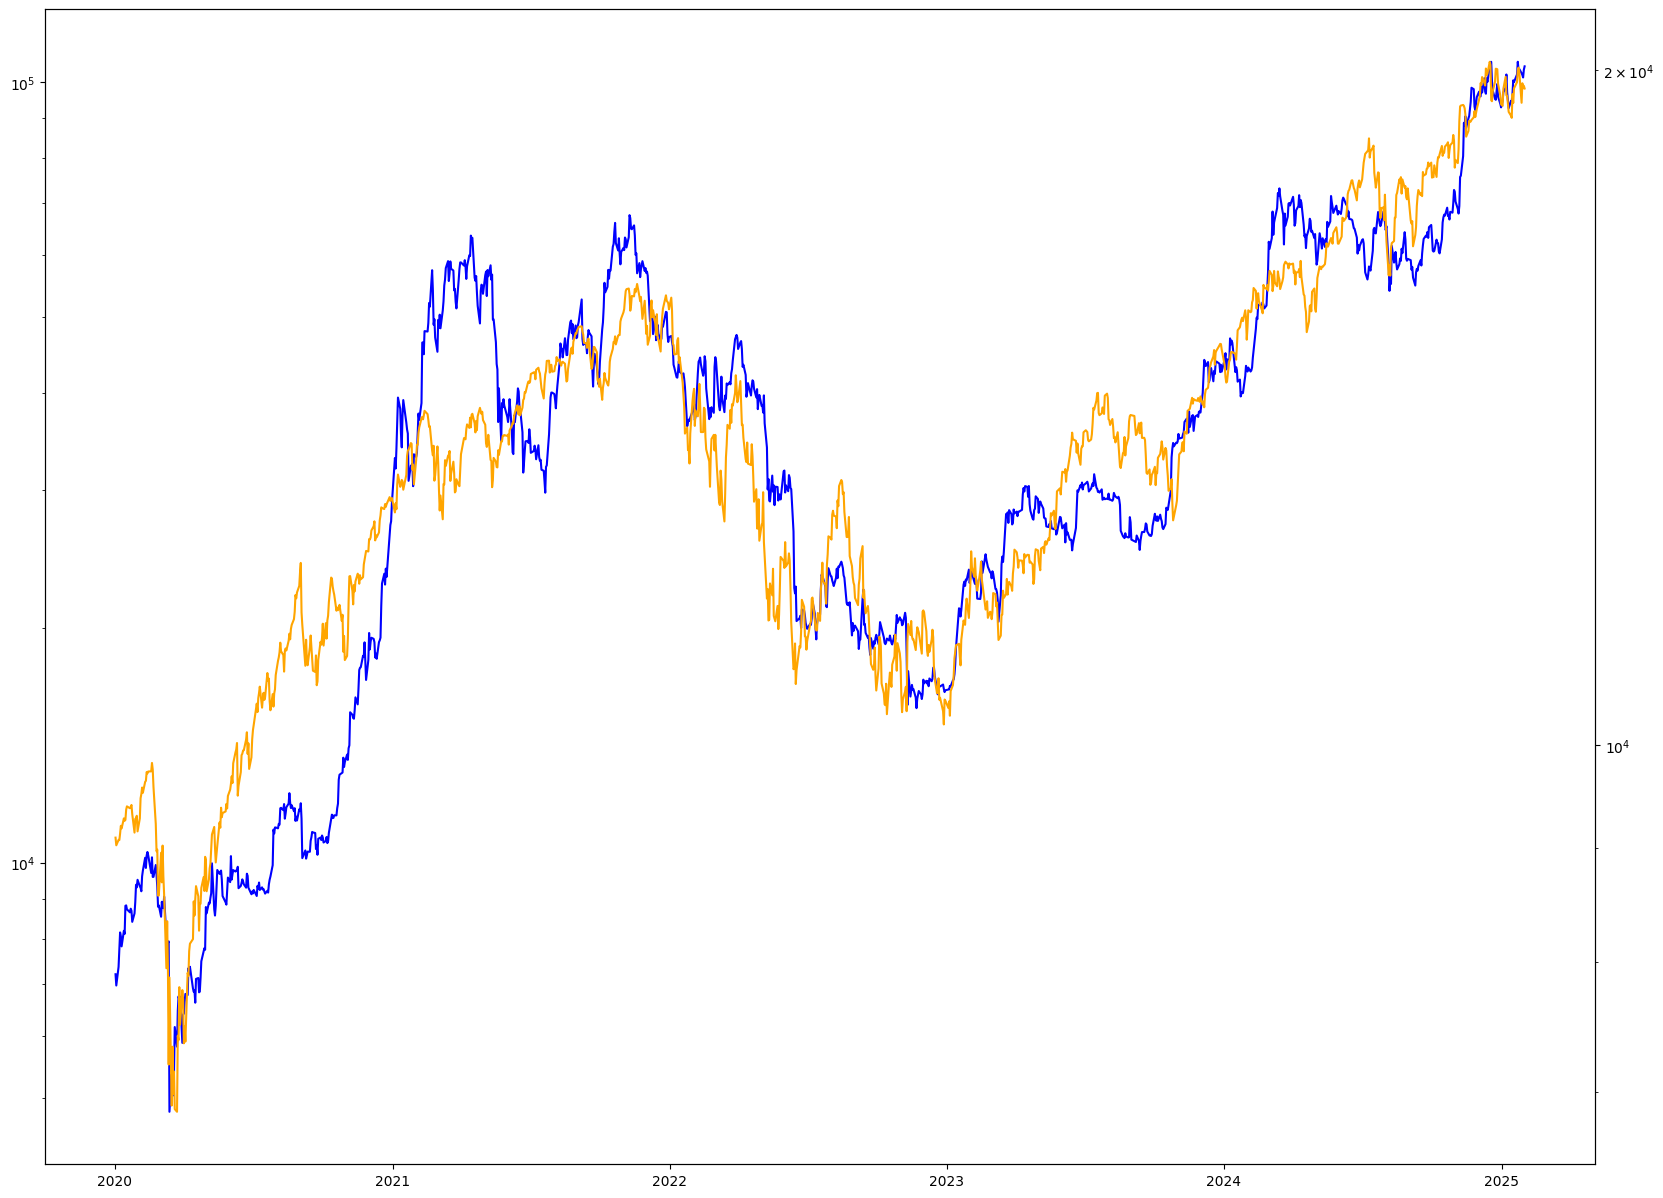

In [68]:
#plot_both(df_btc, df_eth)
plot_both(df_btc, df_ndaq)